Squad 6
Análise multivariada

Importação de bibliotecas necessárias |
Carregamento de arquivo csv |
entendimento do que o arquivo diz e pode ser analisado


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_csv('/content/sample_data/pet_adoption_data.csv')

# 2. Inspecionar as primeiras linhas
print(df.head())

# 3. Verificar tipos de dados e valores nulos
print(df.info())

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1       

Padrões e tendências...
1. Quais padrões e tendências foram identificados?

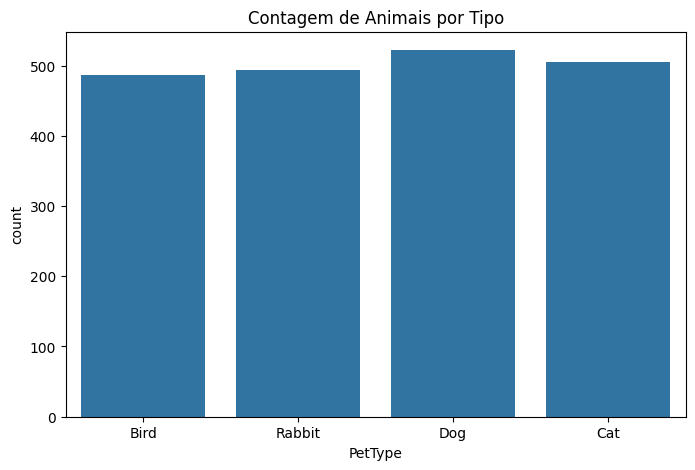

In [ ]:
# análise por tipo de animal e quantidade
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PetType')
plt.title('Contagem de Animais por Tipo')
plt.show()

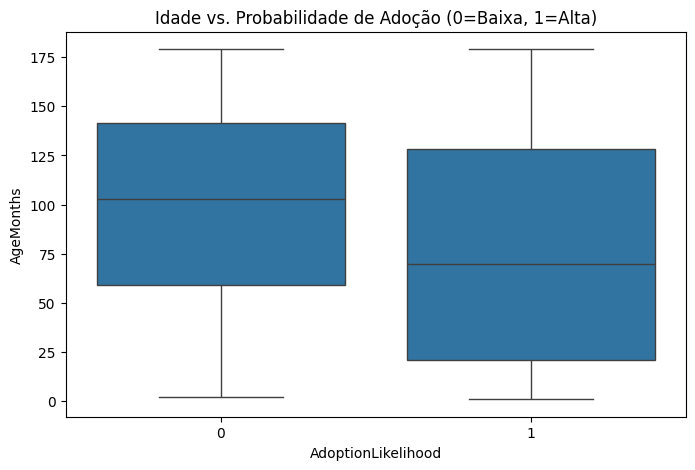

In [ ]:
# análise de idade do pet por probabilidade de adoção
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='AdoptionLikelihood', y='AgeMonths')
plt.title('Idade vs. Probabilidade de Adoção (0=Baixa, 1=Alta)')
plt.show()

Valores Extremos e Faltantes
2.Há valores extremos ou dados faltantes que podem impactar a análise?


In [ ]:
print("Dados Faltantes por Coluna:")
print(df.isnull().sum())

Dados Faltantes por Coluna:
PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64


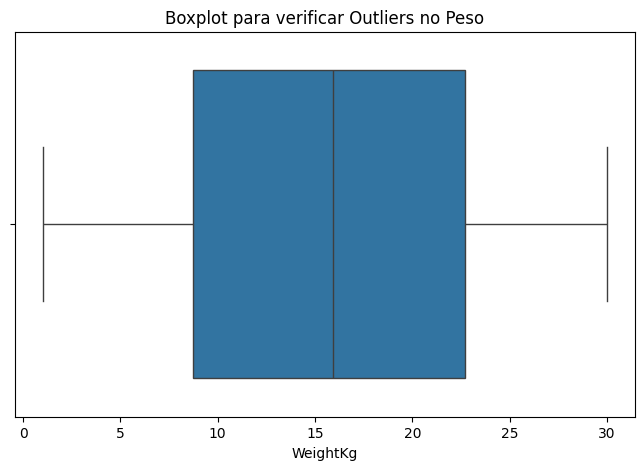

In [ ]:
#outliers de peso
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['WeightKg'])
plt.title('Boxplot para verificar Outliers no Peso')
plt.show()

Correlações
3. Existem correlações ou associações relevantes entre as variáveis?



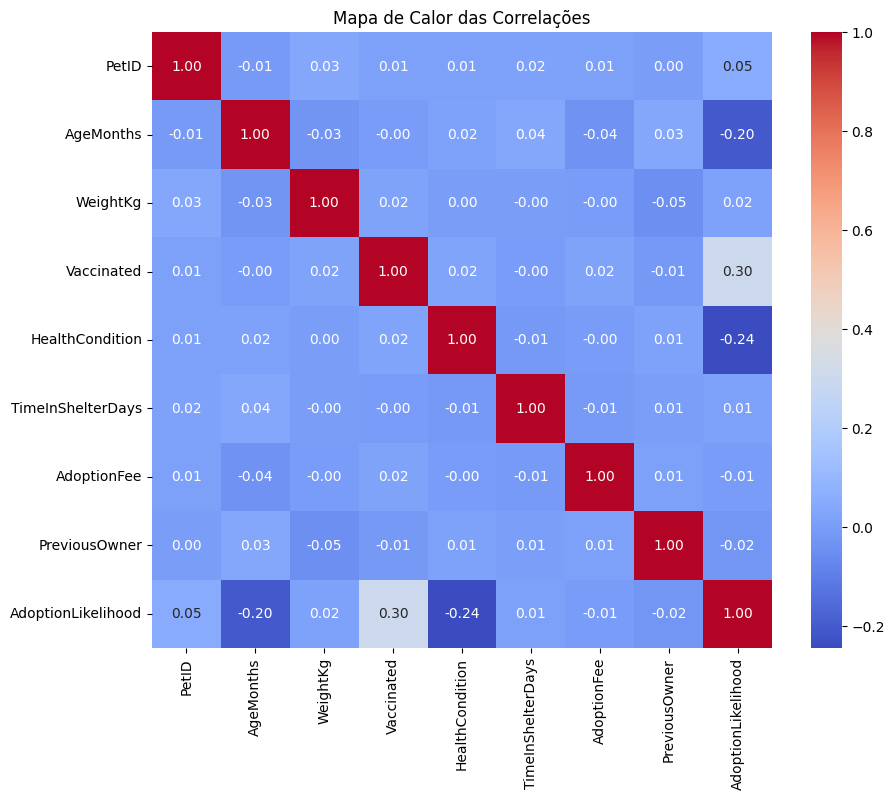

In [ ]:
# Calcular e plotar a matriz de correlação
plt.figure(figsize=(10, 8))
# Seleciona apenas colunas numéricas para correlação
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações')
plt.show()

In [ ]:
# Listar as correlações mais fortes com a chance de adoção
print("O que mais influencia a adoção?")
print(corr['AdoptionLikelihood'].sort_values(ascending=False))

O que mais influencia a adoção?
AdoptionLikelihood    1.000000
Vaccinated            0.301311
PetID                 0.049582
WeightKg              0.017601
TimeInShelterDays     0.008867
AdoptionFee          -0.005486
PreviousOwner        -0.023065
AgeMonths            -0.202209
HealthCondition      -0.244061
Name: AdoptionLikelihood, dtype: float64


1. Quais padrões e tendências foram identificados?

    O que impulsiona a adoção: Animais mais jovens e vacinados são os preferidos e têm muito mais chances de serem adotados.

    O que não importa tanto: O preço da taxa de adoção (AdoptionFee) não faz muita diferença na decisão das pessoas.

    Variedade: O abrigo tem uma quantidade bem equilibrada entre Cães, Gatos, Pássaros e Coelhos.

2. Há valores extremos ou dados faltantes que podem impactar a análise?

    Dados Faltantes: Não. O seu arquivo está perfeito, sem nenhum buraco ou informação vazia.

    Valores Extremos: Não. As idades (até ~15 anos) e pesos dos animais estão dentro do normal para bichos de estimação. Não há erros bizarros que precisem ser corrigidos.

3. Existem correlações ou associações relevantes entre as variáveis?

    Associação Positiva (Ajuda): A Vacinação é o fator que mais aumenta a chance de adoção.

    Associação Negativa (Atrapalha): Problemas de saúde (HealthCondition) e idade avançada (AgeMonths) diminuem bastante a probabilidade de o animal ser adotado.

